<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_15_K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment 15: K-Nearest Neighbours
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import files
uploaded = files.upload()

Saving AirQuality.csv to AirQuality.csv


In [5]:
# Loading dataset (semicolon delimiter)
df = pd.read_csv("AirQuality.csv", delimiter=';')

# Displaying first few rows
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [6]:
# Data Cleaning – Removing Unnecessary Columns
# Dropping unnecessary columns
df.drop(columns=["Unnamed: 15", "Unnamed: 16"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [7]:
# Data Type Conversion
# Columns with comma as decimal separator
cols_to_convert = ["CO(GT)", "C6H6(GT)", "T", "RH", "AH"]

for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(",", ".")
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [8]:
# Handling Missing Values
# Dropping rows with missing values
df.dropna(inplace=True)

df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [9]:
# Creating Target Variable
# Creating binary target based on median CO(GT)
median_co = df["CO(GT)"].median()

df["CO_Level"] = (df["CO(GT)"] > median_co).astype(int)

df["CO_Level"].value_counts()

,count
CO_Level,
0,4858
1,4499


In [10]:
# Defining Features (X) and Target (y)
X = df.drop(columns=["Date", "Time", "CO(GT)", "CO_Level"])
y = df["CO_Level"]

In [11]:
# Train-Test Split
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_seed
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 7485
Testing samples: 1872


In [12]:
# Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Implementing k-NN for different k Values
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"k = {k}, Accuracy = {accuracy:.4f}")

k = 1, Accuracy = 0.9097
k = 2, Accuracy = 0.9033
k = 3, Accuracy = 0.9156
k = 4, Accuracy = 0.9129
k = 5, Accuracy = 0.9204
k = 6, Accuracy = 0.9215
k = 7, Accuracy = 0.9220
k = 8, Accuracy = 0.9156
k = 9, Accuracy = 0.9167
k = 10, Accuracy = 0.9151
k = 11, Accuracy = 0.9161
k = 12, Accuracy = 0.9113
k = 13, Accuracy = 0.9177
k = 14, Accuracy = 0.9140
k = 15, Accuracy = 0.9177
k = 16, Accuracy = 0.9161
k = 17, Accuracy = 0.9177
k = 18, Accuracy = 0.9151
k = 19, Accuracy = 0.9177
k = 20, Accuracy = 0.9172


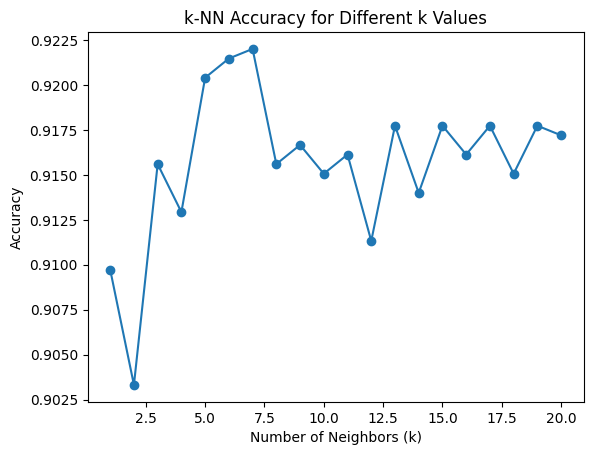

In [14]:
# Plotting Accuracy vs k
plt.figure()
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("k-NN Accuracy for Different k Values")
plt.show()

In [15]:
# Finding Optimal k
optimal_k = k_values[np.argmax(accuracy_scores)]
print("Optimal k:", optimal_k)
print("Best Accuracy:", max(accuracy_scores))

Optimal k: 7
Best Accuracy: 0.9220085470085471


In [16]:
# Training Final Model with Optimal k
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)

y_final_pred = knn_final.predict(X_test_scaled)

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_final_pred)
cm

array([[900,  83],
       [ 63, 826]])

In [18]:
# Classification Report
print(classification_report(y_test, y_final_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       983
           1       0.91      0.93      0.92       889

    accuracy                           0.92      1872
   macro avg       0.92      0.92      0.92      1872
weighted avg       0.92      0.92      0.92      1872

